In [1]:
import warnings
import pandas as pd #進行數據處理的函式庫
import numpy as np #高階大量的維度陣列與矩陣運算
import matplotlib.pyplot as plt #處理資料視覺化的繪圖庫
import seaborn as sns #處理資料視覺化的繪圖庫
from sklearn.datasets import load_wine #採用 Sklearn 所提供的葡萄酒分類的資料集

# 1) 載入資料集

# 葡萄酒分類的資料集

In [2]:
wine = load_wine()
df_data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= ["alcohol","malic_acid","ash","alcalinity_of_ash","magnesium","total_phenols","flavanoids","nonflavanoid_phenols","proanthocyanins","color_intensity","hue","od280/od315_of_diluted_wines","proline","age"])
df_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,age
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


## 2) 切割訓練集與測試集

In [3]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['age'],axis=1).values # 移除age並取得剩下欄位資料
y = df_data['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (124, 13)
test shape: (54, 13)


## PCA
Parameters:
- n_components: 指定PCA降維後的特徵維度數目。
- whiten: 是否進行白化True/False。白化意指，對降維後的數據的每個特徵進行正規化，即讓方差都為1、平均值為0。默認值為False。
- random_state: 亂數種子，設定常數能夠保證每次PCA結果都一樣。

Attributes:
- explained_variance_： array類型。降維後的各主成分的方差值，主成分方差值越大，則說明這個主成分越重要
- explained_variance_ratio_： array類型。降維後的各主成分的方差值佔總方差值的比例，主成分所佔比例越大，則說明這個主成分越重要。
- n_components_： int類型。返回保留的特徵個數。

Methods:
- fit(X,y)：把數據放入模型中訓練模型。
- fit_transform(X,[,y])all：訓練模型同時返回降維後的數據。
- transform(X)：對於訓練好的數據降維。

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)

print('PCA方差比: ',pca.explained_variance_ratio_)
print('PCA方差值:',pca.explained_variance_)

PCA方差比:  [0.99775928 0.00205752]
PCA方差值: [94946.72877516   195.79382233]


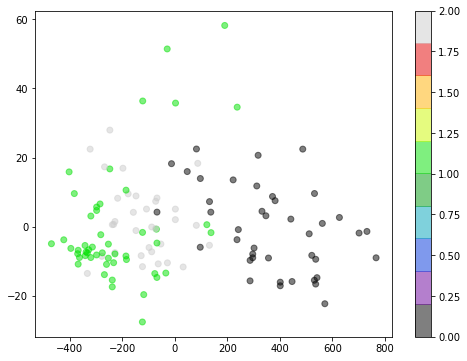

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_train, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

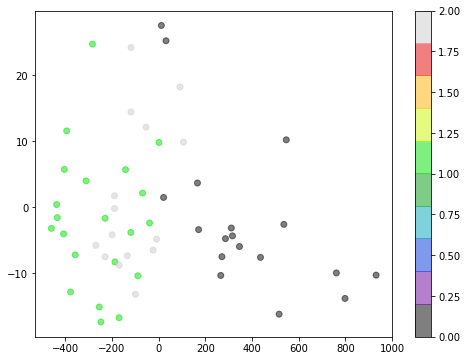

In [6]:
test_reduced = pca.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(test_reduced[:, 0], test_reduced[:, 1], c=y_test, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

## 其他種類 PCA
- KernelPCA
    - KernelPCA模型類似於非線性支持向量機，使用核技巧處理非線性數據的降維，主要是選擇合適的核函數。

- IncrementalPCA
    - IncrementalPCA模型主要是為了解決計算機內存限制問題。工業上樣本量和維度都是非常大的，如果直接擬合數據，機器性能一般都無法支撐。IncrementalPCA則會將數據分成多個batch，然後對每個batch依次遞增調用partial_fit函數對樣本降維。

- SparsePCA
    - SparsePCA模型相較於普通的PCA區別在於使用了L1正則化，即對非主成分的影響降為0，避免了噪聲對降維的影響。

- MiniBatchSparsePCA
    - MiniBatchSparsePCA模型類似於SparsePCA，不同之處在於MiniBatchSparsePCA模型通過使用一部分樣本特徵和給定的迭代次數進行降維，以此來解決特徵分解過慢的問題。

## t-SNE
t-SNE使用了更複雜的公式來表達高維與低維之間的關係。且能夠允許非線性的轉換。

Parameters:
- n_components: 指定t-SNE降維後的特徵維度數目。
- n_iter: 設定迭代次數。
- random_state: 亂數種子，設定常數能夠保證每次t-SNE結果都一樣。

Attributes:
- explained_variance_： array類型。降維後的各主成分的方差值，主成分方差值越大，則說明這個主成分越重要
- explained_variance_ratio_： array類型。降維後的各主成分的方差值佔總方差值的比例，主成分所佔比例越大，則說明這個主成分越重要。
- n_components_： int類型。返回保留的特徵個數。

Methods:
- fit(X,y)：把數據放入模型中訓練模型。
- fit_transform(X)：訓練模型同時返回降維後的數據。
- transform(X)：對於訓練好的數據降維。

In [7]:
from sklearn.manifold import TSNE

tsneModel = TSNE(n_components=2, random_state=42,n_iter=1000)
train_reduced = tsneModel.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


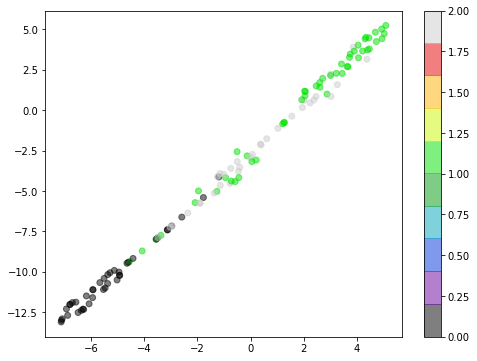

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_train, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

###  t-SNE 不適用於新資料

PCA 降維可以適用新資料，可呼叫transform() 函式即可。而 t-SNE 則不行。因為演算法的關係在 scikit-learn 套件中的 t-SNE 演算法並沒有transform() 函式可以呼叫。